In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #used for scaling features for machine learning


In [33]:
#deviding the dataset into test and train as always!
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [34]:
# Checking the basic information of the training data
print("Train Data Information:")
print("="*50)
print("Below is the basic summary of the training dataset, including the number of non-null values and data types of each column.\n")
train_data_info = train_data.info()
print(train_data_info)
print("="*50)

# Checking the basic information of the test data
print("\nTest Data Information:")
print("="*50)
print("Below is the basic summary of the test dataset, including the number of non-null values and data types of each column.\n")
test_data_info = test_data.info()
print(test_data_info)
print("="*50)

# Displaying the first few rows of the training data for sample inspection
print("\nTrain Data Sample Preview:")
print("="*50)
print("The first 5 rows of the training dataset are displayed below. This helps to quickly inspect the structure and content of the dataset.\n")
train_data_sample = train_data.head()
print(train_data_sample)
print("="*50)

# Displaying the first few rows of the test data for sample inspection
print("\nTest Data Sample Preview:")
print("="*50)
print("The first 5 rows of the test dataset are displayed below. This helps to quickly inspect the structure and content of the dataset.\n")
test_data_sample = test_data.head()
print(test_data_sample)
print("="*50)


Train Data Information:
Below is the basic summary of the training dataset, including the number of non-null values and data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Test Data Information:
Below is the basic summary of the test dataset, including the numbe

In [35]:
# Check for missing data in the training and test datasets
print("Checking for Missing Values in the Training and Test Datasets")
print("="*70)

# Missing values in the training data
print("Missing Values in the Training Data:")
print("-" * 70)
print("Below is the count of missing values for each column in the training dataset. If any column has missing values, it will be shown with a non-zero count. This helps us identify where data cleaning may be needed (e.g., imputation, removal of rows/columns).\n")
train_missing = train_data.isnull().sum()
print(train_missing)
print("-" * 70)

# Summary of missing values in the training data
total_train_missing = train_missing.sum()
if total_train_missing > 0:
    print(f"\nTotal missing values in the training dataset: {total_train_missing}")
    print("Action: Consider handling missing values by using techniques such as mean/median imputation, filling with mode, or dropping rows/columns with too many missing values.")
else:
    print("\nNo missing values found in the training dataset. The data appears to be clean.")

print("="*70)

# Missing values in the test data
print("\nMissing Values in the Test Data:")
print("-" * 70)
print("Below is the count of missing values for each column in the test dataset. This helps us ensure that the test data is properly cleaned before model predictions.\n")
test_missing = test_data.isnull().sum()
print(test_missing)
print("-" * 70)

# Summary of missing values in the test data
total_test_missing = test_missing.sum()
if total_test_missing > 0:
    print(f"\nTotal missing values in the test dataset: {total_test_missing}")
    print("Action: Consider handling missing values in the test dataset using similar techniques to those applied to the training data.")
else:
    print("\nNo missing values found in the test dataset. The data appears to be clean and ready for use.")


Checking for Missing Values in the Training and Test Datasets
Missing Values in the Training Data:
----------------------------------------------------------------------
Below is the count of missing values for each column in the training dataset. If any column has missing values, it will be shown with a non-zero count. This helps us identify where data cleaning may be needed (e.g., imputation, removal of rows/columns).

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------------------------------------

Total missing values in the training dataset: 866
Action: Consider handling missing values by using techniques such as mean/median imputation, filling with mode, or dropping rows/columns with too many missing values.

Missing Values in the Test Data:
-----------

In [36]:
# Handling missing values in 'Age' and 'Fare' columns by filling with the mean
print("Handling missing values in 'Age' and 'Fare' columns:")
print("Filling missing values in 'Age' with the mean value of the respective column.")
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)

print("Filling missing values in 'Fare' with the mean value of the respective column.")
train_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)

# Explanation:
# We use the mean to fill missing values in the 'Age' and 'Fare' columns.
# This is a common technique to avoid dropping rows with missing values,
# ensuring that the overall distribution of these features remains relatively unaffected.

# Handling missing values in the 'Embarked' column by filling with the mode
print("\nHandling missing values in the 'Embarked' column:")
print("Filling missing values in 'Embarked' with the mode (most frequent value) of the column.")
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Explanation:
# For categorical columns like 'Embarked', it makes more sense to use the mode (the most frequent category)
# rather than the mean. This prevents introducing an unrealistic category.

# Convert categorical variables ('Sex', 'Embarked') into numerical form using one-hot encoding
print("\nConverting categorical columns to numeric using one-hot encoding:")
print("Using pd.get_dummies() to convert 'Sex' and 'Embarked' into binary columns.")
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Explanation:
# One-hot encoding is used to convert categorical variables into numeric form for machine learning models.
# The 'drop_first=True' parameter avoids multicollinearity by dropping one category (e.g., 'Female' if 'Sex' is 'Male' and 'Female').
# This ensures that the model can interpret categorical data effectively without redundancy.


Handling missing values in 'Age' and 'Fare' columns:
Filling missing values in 'Age' with the mean value of the respective column.
Filling missing values in 'Fare' with the mean value of the respective column.

Handling missing values in the 'Embarked' column:
Filling missing values in 'Embarked' with the mode (most frequent value) of the column.

Converting categorical columns to numeric using one-hot encoding:
Using pd.get_dummies() to convert 'Sex' and 'Embarked' into binary columns.


C:\Users\Arash\AppData\Local\Temp\ipykernel_14020\804104918.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
C:\Users\Arash\AppData\Local\Temp\ipykernel_14020\804104918.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [37]:
# Normalizing 'Age' and 'Fare' columns using StandardScaler
print("\nNormalizing 'Age' and 'Fare' columns to ensure consistent scaling across features.")
scaler = StandardScaler()

# Fit and transform the 'Age' and 'Fare' columns in the training data
print("Fitting scaler on training data and transforming 'Age' and 'Fare'.")
train_data[['Age', 'Fare']] = scaler.fit_transform(train_data[['Age', 'Fare']])

# Apply the same transformation (without re-fitting) to the test data
print("Transforming 'Age' and 'Fare' in the test data using the same scaling from training data.")
test_data[['Age', 'Fare']] = scaler.transform(test_data[['Age', 'Fare']])

# Display a sample of the preprocessed training data
print("\nSample of the training data after normalization:")
print(train_data.head())



Normalizing 'Age' and 'Fare' columns to ensure consistent scaling across features.
Fitting scaler on training data and transforming 'Age' and 'Fare'.
Transforming 'Age' and 'Fare' in the test data using the same scaling from training data.

Sample of the training data after normalization:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.592481      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1      0   
2                             Heikkinen, Miss. Laina -0.284663      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                           Allen, Mr. William Henry  0.407926      0      0   

           

In [38]:
# Selecting features (input properties) and labels (target variable)
# Features are the columns that the model will use to make predictions
print("\nSelecting input features (Xtrain) and labels (Ytrain) for training:")

# For training data (Xtrain) - Features: Pclass, Sex (converted to male), Age, SibSp, Parch, Fare, Embarked categories (Q, S)
Xtrain = train_data[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# Labels (Ytrain) - Target: Survived (this is what we want the model to predict)
Ytrain = train_data['Survived']

# For test data (Xtest) - Same features as in the training data
Xtest = test_data[['Pclass', 'Sex_male', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

# Display the first few rows of the feature matrix and labels to verify selection
print("\nFeature Matrix (Xtrain):")
print(Xtrain.head())  # Print a sample of the features (Xtrain)

print("\nLabels (Ytrain):")
print(Ytrain.head())  # Print a sample of the labels (Ytrain)

# Converting any boolean values (True/False) in the data to numerical values (1/0)
# Some machine learning algorithms require all inputs to be numeric
print("\nReplacing any boolean values (True/False) with 1/0 in the training and test data:")
Xtrain = Xtrain.replace({True: 1, False: 0})
Xtest = Xtest.replace({True: 1, False: 0})

# Summary of changes
print("\nUpdated Feature Matrix (Xtrain) after replacing boolean values:")
print(Xtrain.head())  # Display updated feature matrix for Xtrain



Selecting input features (Xtrain) and labels (Ytrain) for training:

Feature Matrix (Xtrain):
   Pclass  Sex_male       Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
0       3      True -0.592481      1      0 -0.502445       False        True
1       1     False  0.638789      1      0  0.786845       False       False
2       3     False -0.284663      0      0 -0.488854       False        True
3       1     False  0.407926      1      0  0.420730       False        True
4       3      True  0.407926      0      0 -0.486337       False        True

Labels (Ytrain):
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Replacing any boolean values (True/False) with 1/0 in the training and test data:

Updated Feature Matrix (Xtrain) after replacing boolean values:
   Pclass  Sex_male       Age  SibSp  Parch      Fare  Embarked_Q  Embarked_S
0       3         1 -0.592481      1      0 -0.502445           0           1
1       1         0  0.638789      1      0  0.7868

C:\Users\Arash\AppData\Local\Temp\ipykernel_14020\2033183489.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xtrain = Xtrain.replace({True: 1, False: 0})
C:\Users\Arash\AppData\Local\Temp\ipykernel_14020\2033183489.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xtest = Xtest.replace({True: 1, False: 0})


In [39]:
# Converting input features and labels to NumPy arrays for neural network processing
print("\nConverting training and test data to NumPy arrays for neural network input:")

# Convert feature matrices (Xtrain and Xtest) to NumPy arrays of float type
Xtrain = np.array(Xtrain, dtype=float)
Xtest = np.array(Xtest, dtype=float)

# Convert labels (Ytrain) to NumPy array and reshape to ensure it's a column vector (m, 1)
print("Reshaping Ytrain to ensure it's a column vector (m, 1).")
Ytrain = np.array(Ytrain).reshape(-1, 1)  # Reshape to (m, 1) where m is the number of samples

# Display information about the converted arrays
print("\nType of Xtrain:", type(Xtrain))  # Ensure Xtrain is now a NumPy array
print("Shape of Xtrain:", Xtrain.shape)  # Check the shape to confirm it's correctly formatted
print("First few rows of Xtrain (sample data):")  # Show a small sample of the feature matrix
print(Xtrain[:5])

# Checking for any NaN values in the converted data
print("\nChecking for NaN values in Xtrain:")
nan_count = np.isnan(Xtrain).sum()  # Check for NaN values in the feature matrix
if nan_count > 0:
    print(f"Warning: {nan_count} NaN values found in Xtrain. Consider handling them before training.")
else:
    print("No NaN values found in Xtrain. Data is clean.")

# Similar check can be done for Xtest and Ytrain if needed



Converting training and test data to NumPy arrays for neural network input:
Reshaping Ytrain to ensure it's a column vector (m, 1).

Type of Xtrain: <class 'numpy.ndarray'>
Shape of Xtrain: (891, 8)
First few rows of Xtrain (sample data):
[[ 3.          1.         -0.5924806   1.          0.         -0.50244517
   0.          1.        ]
 [ 1.          0.          0.63878901  1.          0.          0.78684529
   0.          0.        ]
 [ 3.          0.         -0.2846632   0.          0.         -0.48885426
   0.          1.        ]
 [ 1.          0.          0.40792596  1.          0.          0.42073024
   0.          1.        ]
 [ 3.          1.          0.40792596  0.          0.         -0.48633742
   0.          1.        ]]

Checking for NaN values in Xtrain:
No NaN values found in Xtrain. Data is clean.


In [40]:
# Neural Network Initialization: Defining the sizes of the layers
print("\nInitializing neural network parameters:")

# Number of input features (same as the number of columns in Xtrain)
input_size = Xtrain.shape[1]  
print(f"Input Layer Size (number of features): {input_size}")

# Number of neurons in the hidden layer (set to 4 here, can be adjusted)
hidden_size = 4  
print(f"Hidden Layer Size (number of neurons): {hidden_size}")

# Number of neurons in the output layer (1 neuron for binary classification: Survived/Not Survived)
output_size = 1  
print(f"Output Layer Size (number of neurons): {output_size}")

# Setting a random seed for reproducibility (ensures that the random weights will be the same each time)
np.random.seed(42)

# Initializing weights between the input layer and hidden layer
# The weights are initialized with small random values, multiplied by 0.01 to keep them small
W1 = np.random.randn(input_size, hidden_size) * 0.01
print(f"\nInitial Weights (W1) between Input and Hidden Layer:\n{W1}")

# Initializing biases for the hidden layer to zeros
b1 = np.zeros((1, hidden_size))
print(f"\nInitial Biases (b1) for the Hidden Layer:\n{b1}")

# Initializing weights between the hidden layer and output layer
W2 = np.random.randn(hidden_size, output_size) * 0.01
print(f"\nInitial Weights (W2) between Hidden and Output Layer:\n{W2}")

# Initializing biases for the output layer to zeros
b2 = np.zeros((1, output_size))
print(f"\nInitial Biases (b2) for the Output Layer:\n{b2}")

# Summary of neural network structure
print(f"\nNeural network initialized with {input_size} input features, {hidden_size} hidden neurons, and {output_size} output neuron.")



Initializing neural network parameters:
Input Layer Size (number of features): 8
Hidden Layer Size (number of neurons): 4
Output Layer Size (number of neurons): 1

Initial Weights (W1) between Input and Hidden Layer:
[[ 0.00496714 -0.00138264  0.00647689  0.0152303 ]
 [-0.00234153 -0.00234137  0.01579213  0.00767435]
 [-0.00469474  0.0054256  -0.00463418 -0.0046573 ]
 [ 0.00241962 -0.0191328  -0.01724918 -0.00562288]
 [-0.01012831  0.00314247 -0.00908024 -0.01412304]
 [ 0.01465649 -0.00225776  0.00067528 -0.01424748]
 [-0.00544383  0.00110923 -0.01150994  0.00375698]
 [-0.00600639 -0.00291694 -0.00601707  0.01852278]]

Initial Biases (b1) for the Hidden Layer:
[[0. 0. 0. 0.]]

Initial Weights (W2) between Hidden and Output Layer:
[[-0.00013497]
 [-0.01057711]
 [ 0.00822545]
 [-0.01220844]]

Initial Biases (b2) for the Output Layer:
[[0.]]

Neural network initialized with 8 input features, 4 hidden neurons, and 1 output neuron.


In [41]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, seed=42):
        np.random.seed(seed)
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward_pass(self, X):
        z1 = np.dot(X, self.W1) + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        y_hat = 1 / (1 + np.exp(-z2))
        return y_hat, z1, a1

    def backpropagation(self, X, y, y_hat, z1, a1):
        m = X.shape[0]
        dz2 = (y_hat - y).reshape(m, 1)
        dW2 = np.dot(a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        dz1 = np.dot(dz2, self.W2.T) * (1 - np.tanh(z1) ** 2)
        dW1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        return dW1, db1, dW2, db2

    def update_parameters(self, dW1, db1, dW2, db2, learning_rate=0.01):
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def predict(self, X):
        y_hat, _, _ = self.forward_pass(X)
        predictions = (y_hat > 0.5).astype(int)
        return predictions

    def train_and_evaluate(self, Xtrain, Ytrain, Xtest, num_iterations, learning_rate):
        losses = []

        for i in range(num_iterations):
            y_hat, z1, a1 = self.forward_pass(Xtrain)
            loss = np.mean(-Ytrain * np.log(y_hat) - (1 - Ytrain) * np.log(1 - y_hat))
            losses.append(loss)

            dW1, db1, dW2, db2 = self.backpropagation(Xtrain, Ytrain, y_hat, z1, a1)
            self.update_parameters(dW1, db1, dW2, db2, learning_rate)

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss:.4f}")

        predictions = self.predict(Xtest)
        
        submission = pd.DataFrame({
            "PassengerId": np.arange(1, len(predictions) + 1),
            "Survived": predictions.flatten()
        })
        submission.to_csv("titanic_predictions.csv", index=False)

        return predictions, losses

# Example usage:
input_size = 8  # Number of features
hidden_size = 4  # Hidden layer neurons
output_size = 1  # Binary output
num_iterations = 1000
learning_rate = 0.01

# Initialize neural network
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# Assuming Xtrain, Ytrain, Xtest are available as preprocessed numpy arrays
predictions, losses = nn.train_and_evaluate(Xtrain, Ytrain, Xtest, num_iterations, learning_rate)

print("Training complete.")


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.6822
Iteration 200, Loss: 0.6754
Iteration 300, Loss: 0.6710
Iteration 400, Loss: 0.6677
Iteration 500, Loss: 0.6650
Iteration 600, Loss: 0.6625
Iteration 700, Loss: 0.6598
Iteration 800, Loss: 0.6569
Iteration 900, Loss: 0.6536
Training complete.


Iteration 0, Loss: 0.6500
Iteration 100, Loss: 0.6458
Iteration 200, Loss: 0.6410
Iteration 300, Loss: 0.6355
Iteration 400, Loss: 0.6293
Iteration 500, Loss: 0.6223
Iteration 600, Loss: 0.6147
Iteration 700, Loss: 0.6064
Iteration 800, Loss: 0.5976
Iteration 900, Loss: 0.5885
Iteration 1000, Loss: 0.5792
Iteration 1100, Loss: 0.5698
Iteration 1200, Loss: 0.5605
Iteration 1300, Loss: 0.5516
Iteration 1400, Loss: 0.5430
Iteration 1500, Loss: 0.5350
Iteration 1600, Loss: 0.5275
Iteration 1700, Loss: 0.5207
Iteration 1800, Loss: 0.5144
Iteration 1900, Loss: 0.5088
Iteration 2000, Loss: 0.5038
Iteration 2100, Loss: 0.4993
Iteration 2200, Loss: 0.4953
Iteration 2300, Loss: 0.4917
Iteration 2400, Loss: 0.4884
Iteration 2500, Loss: 0.4855
Iteration 2600, Loss: 0.4829
Iteration 2700, Loss: 0.4806
Iteration 2800, Loss: 0.4784
Iteration 2900, Loss: 0.4764
Iteration 3000, Loss: 0.4746
Iteration 3100, Loss: 0.4728
Iteration 3200, Loss: 0.4712
Iteration 3300, Loss: 0.4697
Iteration 3400, Loss: 0.46

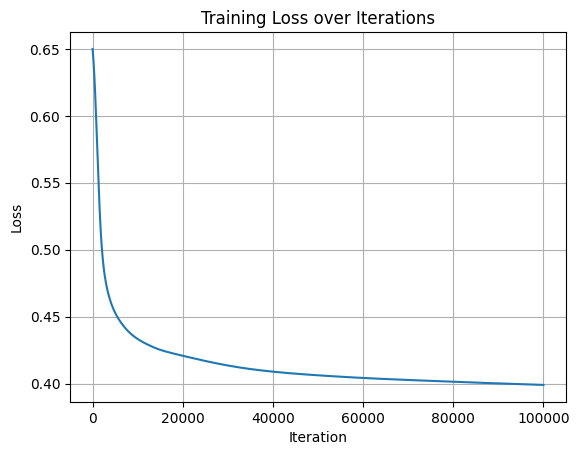

In [42]:
# Train the model
predictions, losses = nn.train_and_evaluate(Xtrain, Ytrain, Xtest, num_iterations=100000, learning_rate=0.01)

# Ensure the 'PassengerId' column is in the test data
if 'PassengerId' in test_data.columns:
    submission = pd.DataFrame({
        "PassengerId": test_data['PassengerId'],  # Using PassengerId from test data
        "Survived": predictions.flatten()         # Predictions from the model
    })
else:
    submission = pd.DataFrame({
        "PassengerId": np.arange(1, len(predictions) + 1),  # Auto-generate PassengerId if not in test_data
        "Survived": predictions.flatten()
    })

# Save the predictions to a CSV file
output_file = 'titanic_predictions.csv'
submission.to_csv(output_file, index=False)

print(f"File saved as {output_file}")

# Download the file for use (e.g., on Google Colab)
try:
    from google.colab import files
    files.download(output_file)
    print("File download initiated.")
except ImportError:
    print("Not running in Colab, skipping file download.")

# Optional: Plot loss over iterations to visualize training progress
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Training Loss over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()
